Exercise 1: Implement K Means clustering algorithm

In [1]:
#Importing required packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_svmlight_file

#Read file in libSvm format
xData,yData = load_svmlight_file("Iris.dat")

#Convert libSvm to matrix form
x = pd.DataFrame(xData.todense(),columns = ['sl','sw','pl','pw'])
y = pd.DataFrame(pd.SparseSeries(yData),columns = ['class'])

#Shuffling data and converting back to x and y since data is ordered
result = pd.concat([x,y], axis=1)
result.sample(frac=1)
y['class'] = result['class']
x = result.drop('class', axis=1)

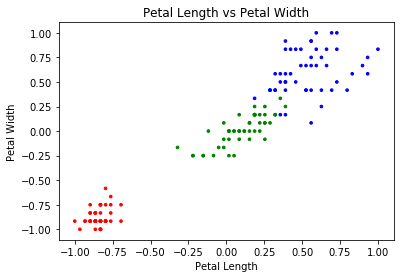

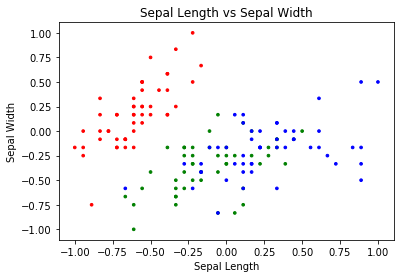

In [2]:
#Assigning different color to each cluster
colors = ['red' if l == 1 else 'green' if l == 2 else 'blue' for l in y['class']]

#Plotting clusters based on Petal length and width
plt.scatter(x['pl'], x['pw'], c=colors, s=7)
plt.xlabel("Petal Length")
plt.ylabel("Petal Width")
plt.title("Petal Length vs Petal Width")
plt.show()

#Plotting clusters based on Sepal length and width
plt.scatter(x['sl'], x['sw'], c=colors, s=7)
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.title("Sepal Length vs Sepal Width")
plt.show()

In [3]:
#Compute euclidean distance
def euclideanDistance(a, b , ax=1):
    return np.linalg.norm(a - b, axis=ax)

In [4]:
# Generate random initial cluster centroids
def initialCentroid(x,k):
    # sl coordinates of random centroids
    cW = [np.random.uniform(np.min(x['sl']), np.max(x['sl'])) for i in range(k)]
    # sw coordinates of random centroids
    cX= [np.random.uniform(np.min(x['sw']), np.max(x['sw']))  for i in range(k)]
    # pl coordinates of random centroids
    cY = [np.random.uniform(np.min(x['pl']), np.max(x['pl'])) for i in range(k)]
    # pw coordinates of random centroids
    cZ = [np.random.uniform(np.min(x['pw']), np.max(x['pw']))for i in range(k)]
    c = np.array(list(zip(cW,cX,cY,cZ)), dtype=np.float32)
    return(c)

In [31]:
#K means clustering
def kMeans(x,k):
    from copy import deepcopy
    c = initialCentroid1(x,k)
    # To store the value of centroids when it updates
    cOld = np.zeros(c.shape).astype("float")
    # Cluster Lables(0, 1, 2)
    clusters = np.zeros(x.shape[0])
    # Error func. - Distance between new centroids and old centroids
    error = euclideanDistance(c,cOld,None)
    # Loop will run till the error becomes zero
    while error.sum() != 0:
        # Assigning each value to its closest cluster
        i = 0
        for each in x.values:
            distances= euclideanDistance(np.vstack(each),c)
            cluster = np.argmin(distances)
            clusters[i] = cluster
            i = i+1
        # Storing the old centroid values
        cOld = deepcopy(c)
        # Finding the new centroids by taking the average value
        for i in range(k):
            points = [x.iloc[j] for j in range(len(x)) if clusters[j] == i]
            print(isinstance(points, list),points)
            c[i] = (np.mean(points, axis=0)).ravel()
        error = euclideanDistance(c, cOld)
    return(clusters,c)

In [6]:
#Calling function and adding 1 to match with original class values
predicted,centroid = kMeans(x,3)
predicted = predicted+1

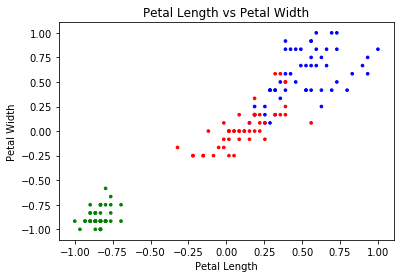

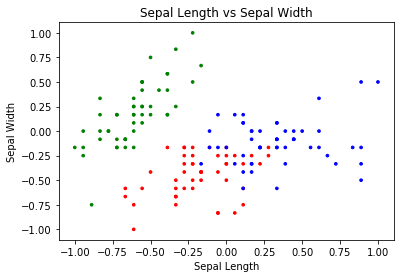

In [7]:
#Assigning different color to each cluster
colors = ['red' if l == 1 else 'green' if l == 2 else 'blue' for l in predicted]

#Plotting clusters based on Petal length and width
plt.scatter(x['pl'], x['pw'], c=colors, s=7)
plt.xlabel("Petal Length")
plt.ylabel("Petal Width")
plt.title("Petal Length vs Petal Width")
plt.show()

#Plotting clusters based on Sepal length and width
plt.scatter(x['sl'], x['sw'], c=colors, s=7)
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.title("Sepal Length vs Sepal Width")
plt.show()

In [43]:
#Adjusting the clusters, so as to accomodate computation of accuracy
original = ['A' if l == 1 else 'B' if l == 2 else 'C' for l in y['class']]
predict = ['A' if l == 2 else 'B' if l == 3 else 'C' for l in predicted]

In [44]:
#Computing acuracy
acc = []
for each,every in zip(original,predict):
    if each == every:
        acc.append(1)
    else:
        acc.append(0)
print("Accuracy : ", np.sum(acc)/len(acc))

Accuracy :  0.833333333333


In [10]:
#Optimal criteria for k
i,SSE = [],[]
for k in range(1,5):
    predicted,centroid = kMeans(x,k)
    predicted = np.array(predicted, dtype=np.int32)
    sse = 0
    for every,j in zip(x.values,predicted):
        sse = sse + (euclideanDistance(every,centroid[[j]]))
    i.append(k)
    SSE.append(sse)

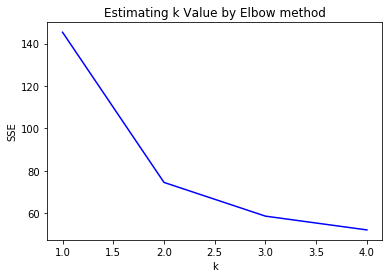

In [11]:
plt.plot(i,SSE,color = 'b')
plt.xlabel("k")
plt.ylabel("SSE")
plt.title("Estimating k Value by Elbow method")
plt.show()

Exercise 2: Cluster news articles

In [3]:
import os
#20 folder names
folder = ['a','b','c','e','f','g','h','i','j','k','l','m','n','o','p','q','r','s','t']

#Reading files in a list(train)
train = []
label = []
j = 1
for each in folder:
    all_files = os.listdir(r'/home/kritz/Documents/ML_Lab/Exercise11/20news-bydate-train/'+each+'/')
    for i in all_files:
        with open(r'/home/kritz/Documents/ML_Lab/Exercise11/20news-bydate-train/'+each+'/'+i,'rb') as f:
            lines = f.read()
            train.append(lines)
            label.append(j)
    j = j+1

#Reading files in a list(test)
test = []
testLabel = []
j = 1
for each in folder:
    all_files = os.listdir(r'/home/kritz/Documents/ML_Lab/Exercise11/20news-bydate-test/'+each+'/')
    for i in all_files:
        with open(r'/home/kritz/Documents/ML_Lab/Exercise11/20news-bydate-test/'+each+'/'+i,'rb') as f:
            lines = f.read()
            test.append(lines)
            testLabel.append(j)
    j = j+1

In [7]:
#Text processing libraries
from nltk.stem import PorterStemmer
from nltk import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer

train = pd.DataFrame([str(i) for i in train])
test = pd.DataFrame([str(i) for i in test])

#Stemming: reducing words to ground form
ps = PorterStemmer()
train['stemmed'] = train.apply(lambda x: [ps.stem(y) for y in x])
test['stemmed'] = test.apply(lambda x: [ps.stem(y) for y in x])

#Converting to Tfid vectors
tfid = TfidfVectorizer(max_df=0.5, max_features=1000, stop_words='english')
tfidTrainX = tfid.fit_transform(train.stemmed.dropna())
tfidTestX = tfid.transform(test.stemmed.dropna())

In [8]:
from sklearn.datasets import dump_svmlight_file
dump_svmlight_file(tfidTrainX,label,"libSvmTrain.dat")
dump_svmlight_file(tfidTestX,testLabel,"libSvmTest.dat")
from sklearn.datasets import load_svmlight_file

#Read file in libSvm format
train = load_svmlight_file("libSvmTrain.dat")
test = load_svmlight_file("libSvmTest.dat")

#For using in previous algorithm
Train = pd.DataFrame(train.todense())
Test = pd.DataFrame(test.todense())

In [14]:
#Generating Centroids for the larger datset
def initialCentroid1(x,k):
    c = []
    for i in range(1000):
        c.append ([np.random.uniform(0,999) for i in range(k)])
    d = np.array(c, dtype=np.float32)
    return(d)

In [33]:
predicted1,centroid1 = kMeans(Train,10)

In [9]:
#Optimal criteria for k
i,SSE = [],[]
for k in range(1,5):
    predicted,centroid = kMeans(train,k)
    predicted = np.array(predicted, dtype=np.int32)
    sse = 0
    for every,j in zip(x.values,predicted):
        sse = sse + (euclideanDistance(every,centroid[[j]]))
    i.append(k)
    SSE.append(sse)

CPU times: user 1min, sys: 1.21 s, total: 1min 1s
Wall time: 33.4 s


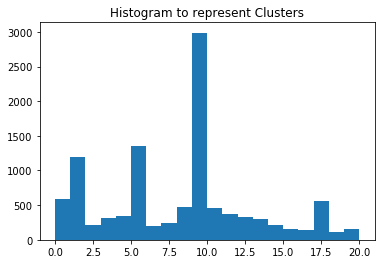

In [34]:
from sklearn.cluster import KMeans

#Number of clusters
num_clusters = 20

#Defining model
km = KMeans(n_clusters=num_clusters)

#Fitting model
%time km.fit(Train)
clusters = km.labels_.tolist()

#plotting
bins = np.linspace(0, 20, 21)
plt.hist(clusters,bins)
plt.title("Histogram to represent Clusters")
plt.show()

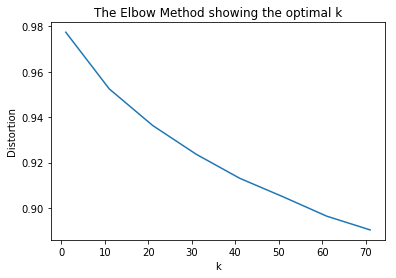

In [40]:
# k means determine k
from scipy.spatial.distance import cdist
distortions = []
K = range(1,80,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(Train)
    kmeanModel.fit(Train)
    distortions.append(sum(np.min(cdist(Train, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / Train.shape[0])
 
# Plot the elbow
plt.plot(K, distortions,)
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()